In [167]:
#points matplot lib to plot the figure inside notebook
#pandas is a data science library
#matplotlib: for data plotting
#matplotlib.pyplot : to define a plot, part of 
%matplotlib inline 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn import tree

In [168]:
#pandas work with data frames
#read_csv

df = pd.read_csv('ScoreBoardFinal.csv')
df.head(10)

,MId,Home_Team,Home_Team_Goals,Away_Team_Goals,Away_Team,Home_Poss,Away_Poss,Home_ShotsT,Away_ShotsT,Home_Shots,...,HTP,HTR,HTAR,HTMR,HTDR,ATP,ATR,ATAR,ATMR,ATDR
0,9601,CAR,1,2,CHE,36.8,63.2,3,7,10,...,14,775.406,151.256,269.512,354.638,14,883.673,166.000,315.499,402.174
1,9602,FUL,2,2,CRY,66.1,33.9,5,6,15,...,14,793.834,182.616,210.218,401.000,14,790.224,144.288,287.936,358.000
2,9603,HUL,0,2,EVE,43,57,3,4,12,...,14,792.189,216.189,219.000,357.000,14,862.968,173.566,293.402,396.000
3,9604,LIV,2,1,NUFC,66.2,33.8,5,2,13,...,14,884.043,269.651,220.392,394.000,14,827.956,84.175,294.260,449.521
4,9605,MCFC,2,0,WHU,68.1,31.9,7,0,28,...,14,912.543,155.313,350.230,407.000,14,808.489,129.325,315.164,364.000
5,9606,NOR,0,2,ARS,37.7,62.3,5,8,11,...,14,805.636,93.648,341.988,370.000,14,869.152,230.624,252.528,386.000
6,9607,SOT,1,1,MUFC,58.5,41.5,6,2,15,...,14,830.718,157.239,296.034,377.445,14,883.726,251.335,229.391,403.000
7,9608,SUN,1,3,SWAN,53.3,46.7,4,4,20,...,14,798.745,76.958,361.257,360.530,14,795.936,278.427,163.175,354.334
8,9609,TOT,3,0,AVL,54.7,45.3,6,1,12,...,14,841.663,148.000,291.936,401.727,13,800.032,181.180,183.000,435.852
9,9610,WBA,1,2,STK,43,57,4,4,18,...,14,810.201,166.403,349.500,294.298,14,793.845,85.944,349.901,358.000


In [169]:
#.loc returns the rows based on the filters or conditions
df_tmp = df.loc[df['Home_ShotsT'] != 'XX-XX-']
df_tmp.head(10)

,MId,Home_Team,Home_Team_Goals,Away_Team_Goals,Away_Team,Home_Poss,Away_Poss,Home_ShotsT,Away_ShotsT,Home_Shots,...,HTP,HTR,HTAR,HTMR,HTDR,ATP,ATR,ATAR,ATMR,ATDR
0,9601,CAR,1,2,CHE,36.8,63.2,3,7,10,...,14,775.406,151.256,269.512,354.638,14,883.673,166.000,315.499,402.174
1,9602,FUL,2,2,CRY,66.1,33.9,5,6,15,...,14,793.834,182.616,210.218,401.000,14,790.224,144.288,287.936,358.000
2,9603,HUL,0,2,EVE,43,57,3,4,12,...,14,792.189,216.189,219.000,357.000,14,862.968,173.566,293.402,396.000
3,9604,LIV,2,1,NUFC,66.2,33.8,5,2,13,...,14,884.043,269.651,220.392,394.000,14,827.956,84.175,294.260,449.521
4,9605,MCFC,2,0,WHU,68.1,31.9,7,0,28,...,14,912.543,155.313,350.230,407.000,14,808.489,129.325,315.164,364.000
5,9606,NOR,0,2,ARS,37.7,62.3,5,8,11,...,14,805.636,93.648,341.988,370.000,14,869.152,230.624,252.528,386.000
6,9607,SOT,1,1,MUFC,58.5,41.5,6,2,15,...,14,830.718,157.239,296.034,377.445,14,883.726,251.335,229.391,403.000
7,9608,SUN,1,3,SWAN,53.3,46.7,4,4,20,...,14,798.745,76.958,361.257,360.530,14,795.936,278.427,163.175,354.334
8,9609,TOT,3,0,AVL,54.7,45.3,6,1,12,...,14,841.663,148.000,291.936,401.727,13,800.032,181.180,183.000,435.852
9,9610,WBA,1,2,STK,43,57,4,4,18,...,14,810.201,166.403,349.500,294.298,14,793.845,85.944,349.901,358.000


In [170]:
df = df_tmp.ix[:,'Home_Poss':]
df = df.apply(lambda x: pd.to_numeric(x, errors = 'ignore'))
names = df.columns
correlations = df.corr()
# plot correlation matrix
correlations

C:\Users\I336006\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,Home_Poss,Away_Poss,Home_ShotsT,Away_ShotsT,Home_Shots,Away_Shots,Home_Touches,Away_Touches,Home_Passes,Away_Passes,...,HTP,HTR,HTAR,HTMR,HTDR,ATP,ATR,ATAR,ATMR,ATDR
Home_Poss,1.000000,-1.000000,0.316120,-0.315443,0.524575,-0.475808,0.895654,-0.897972,0.877316,-0.884429,...,0.025225,0.464898,0.190234,0.042298,0.065889,0.005962,-0.473204,-0.240212,0.003324,-0.066883
Away_Poss,-1.000000,1.000000,-0.316120,0.315443,-0.524575,0.475808,-0.895654,0.897972,-0.877316,0.884429,...,-0.025225,-0.464898,-0.190234,-0.042298,-0.065889,-0.005962,0.473204,0.240212,-0.003324,0.066883
Home_ShotsT,0.316120,-0.316120,1.000000,-0.173285,0.665978,-0.250153,0.332443,-0.279791,0.315805,-0.266711,...,0.053084,0.330653,0.133486,0.005930,0.086834,0.070499,-0.219733,-0.112282,0.001539,-0.029892
Away_ShotsT,-0.315443,0.315443,-0.173285,1.000000,-0.229451,0.630199,-0.277174,0.326558,-0.284377,0.299902,...,0.027838,-0.195858,-0.073407,-0.008440,-0.052068,-0.010597,0.323539,0.106688,0.010279,0.115561
Home_Shots,0.524575,-0.524575,0.665978,-0.229451,1.000000,-0.354441,0.461211,-0.493154,0.419769,-0.493644,...,-0.014093,0.309978,0.139142,0.010991,0.052610,0.027267,-0.305942,-0.119271,-0.040202,-0.031136
Away_Shots,-0.475808,0.475808,-0.250153,0.630199,-0.354441,1.000000,-0.436438,0.438792,-0.443691,0.396951,...,0.006007,-0.274016,-0.086549,-0.057355,-0.025990,-0.031674,0.302355,0.131967,-0.009907,0.089040
Home_Touches,0.895654,-0.895654,0.332443,-0.277174,0.461211,-0.436438,1.000000,-0.646915,0.980318,-0.625277,...,0.038890,0.558134,0.213400,0.029445,0.133905,0.019861,-0.327717,-0.200768,0.018656,-0.018890
Away_Touches,-0.897972,0.897972,-0.279791,0.326558,-0.493154,0.438792,-0.646915,1.000000,-0.625229,0.977526,...,-0.004221,-0.320504,-0.153847,-0.040757,0.005563,0.003360,0.554541,0.247586,0.010373,0.108410
Home_Passes,0.877316,-0.877316,0.315805,-0.284377,0.419769,-0.443691,0.980318,-0.625229,1.000000,-0.577590,...,0.052318,0.561553,0.199638,0.044998,0.132922,0.020404,-0.323569,-0.204948,0.029555,-0.026147
Away_Passes,-0.884429,0.884429,-0.266711,0.299902,-0.493644,0.396951,-0.625277,0.977526,-0.577590,1.000000,...,0.001624,-0.295116,-0.156138,-0.025143,0.007073,0.007578,0.540404,0.227474,0.025252,0.102752


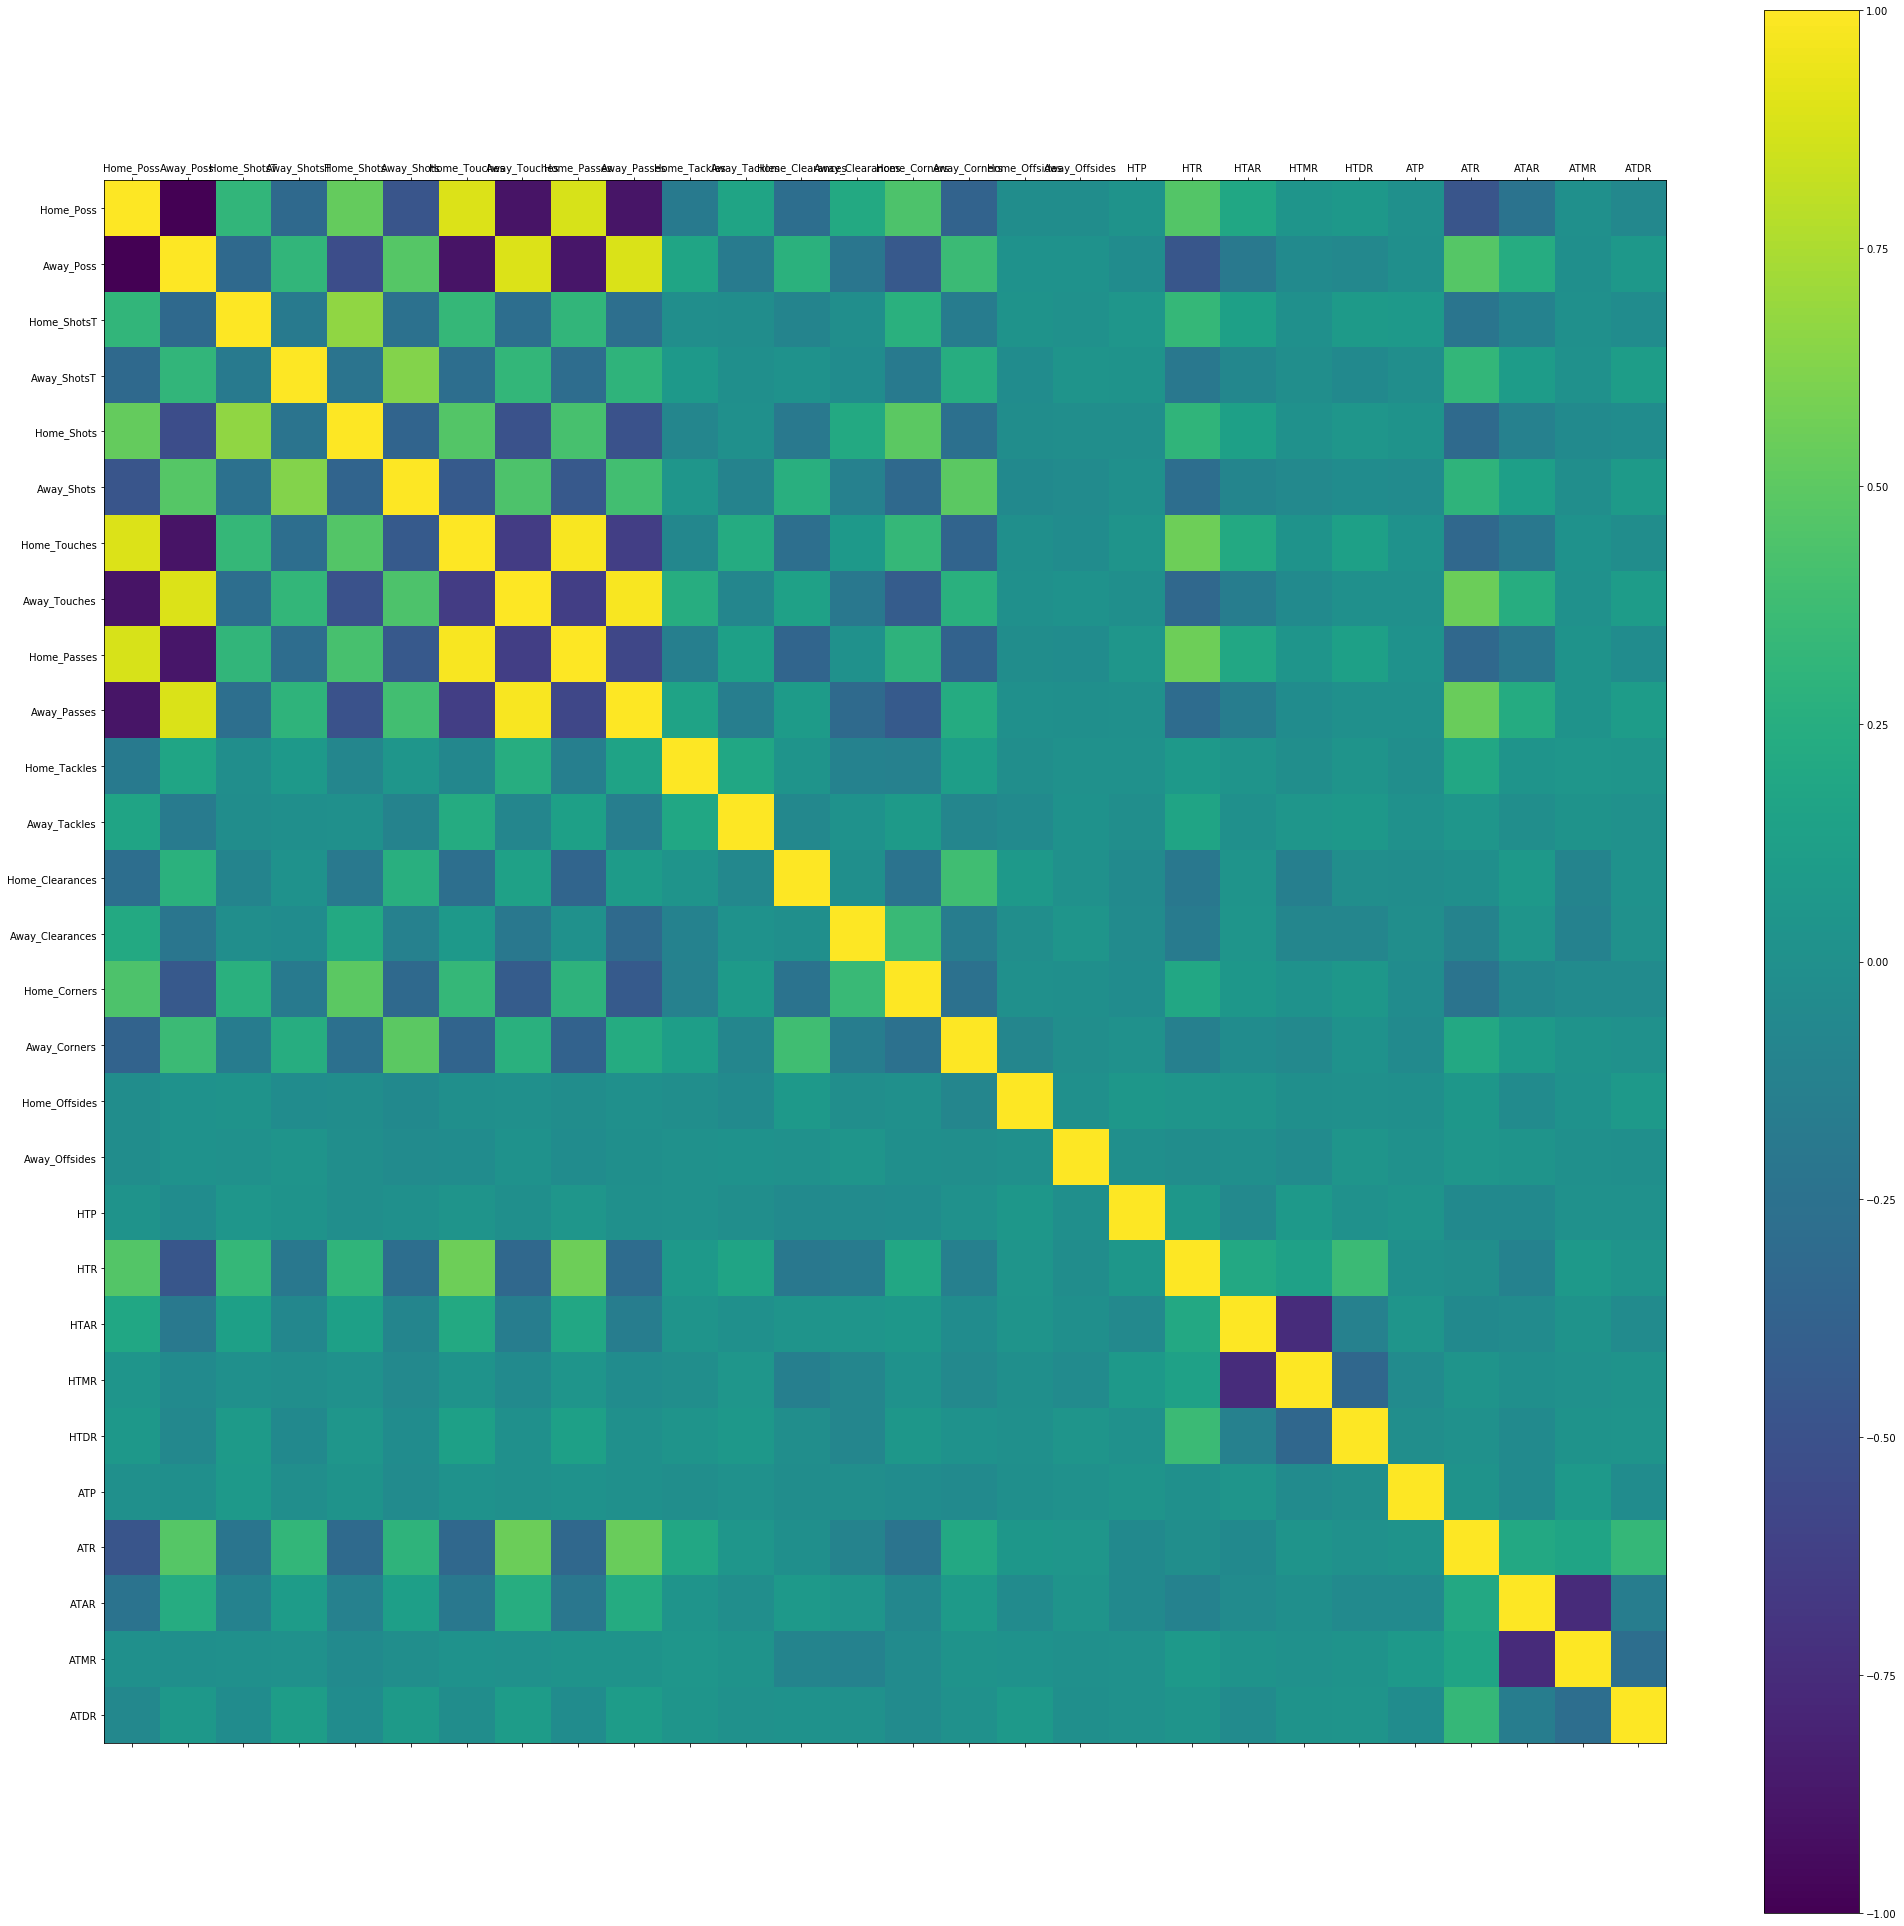

In [171]:
fig = plt.figure(figsize=(35,35))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,28,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [172]:
df = df_tmp
df['Home_Team_Factor'] = 1
df['Away_Team_Factor'] = -1
df.head()

,MId,Home_Team,Home_Team_Goals,Away_Team_Goals,Away_Team,Home_Poss,Away_Poss,Home_ShotsT,Away_ShotsT,Home_Shots,...,HTAR,HTMR,HTDR,ATP,ATR,ATAR,ATMR,ATDR,Home_Team_Factor,Away_Team_Factor
0,9601,CAR,1,2,CHE,36.8,63.2,3,7,10,...,151.256,269.512,354.638,14,883.673,166.000,315.499,402.174,1,-1
1,9602,FUL,2,2,CRY,66.1,33.9,5,6,15,...,182.616,210.218,401.000,14,790.224,144.288,287.936,358.000,1,-1
2,9603,HUL,0,2,EVE,43,57,3,4,12,...,216.189,219.000,357.000,14,862.968,173.566,293.402,396.000,1,-1
3,9604,LIV,2,1,NUFC,66.2,33.8,5,2,13,...,269.651,220.392,394.000,14,827.956,84.175,294.260,449.521,1,-1
4,9605,MCFC,2,0,WHU,68.1,31.9,7,0,28,...,155.313,350.230,407.000,14,808.489,129.325,315.164,364.000,1,-1


In [173]:
df['Winning_Team'] = 0
df.loc[df.Home_Team_Goals == df.Away_Team_Goals,'Winning_Team'] = 0
df.loc[df.Home_Team_Goals > df.Away_Team_Goals,'Winning_Team'] = 1
df.loc[df.Home_Team_Goals < df.Away_Team_Goals,'Winning_Team'] = 2
df.head()

,MId,Home_Team,Home_Team_Goals,Away_Team_Goals,Away_Team,Home_Poss,Away_Poss,Home_ShotsT,Away_ShotsT,Home_Shots,...,HTMR,HTDR,ATP,ATR,ATAR,ATMR,ATDR,Home_Team_Factor,Away_Team_Factor,Winning_Team
0,9601,CAR,1,2,CHE,36.8,63.2,3,7,10,...,269.512,354.638,14,883.673,166.000,315.499,402.174,1,-1,2
1,9602,FUL,2,2,CRY,66.1,33.9,5,6,15,...,210.218,401.000,14,790.224,144.288,287.936,358.000,1,-1,0
2,9603,HUL,0,2,EVE,43,57,3,4,12,...,219.000,357.000,14,862.968,173.566,293.402,396.000,1,-1,2
3,9604,LIV,2,1,NUFC,66.2,33.8,5,2,13,...,220.392,394.000,14,827.956,84.175,294.260,449.521,1,-1,1
4,9605,MCFC,2,0,WHU,68.1,31.9,7,0,28,...,350.230,407.000,14,808.489,129.325,315.164,364.000,1,-1,1


In [174]:
cols = ['MId', 'Home_Team', 'Home_Team_Goals', 'Away_Team_Goals','Away_Team', 'Home_Poss', 'Away_Poss', 'Home_ShotsT','Away_ShotsT', 'Home_Shots', 'Away_Shots', 'Home_Touches','Away_Touches', 'Home_Passes', 'Away_Passes', 'Home_Tackles','Away_Tackles', 'Home_Clearances', 'Away_Clearances','Home_Corners', 'Away_Corners', 'Home_Offsides', 'Away_Offsides','HTP','ATP', 'HTR','ATR', 'HTAR', 'ATAR', 'HTMR', 'ATMR', 'HTDR','ATDR', 'Home_Team_Factor', 'Away_Team_Factor','Winning_Team']
df_final = df[cols]
df_final.head()

,MId,Home_Team,Home_Team_Goals,Away_Team_Goals,Away_Team,Home_Poss,Away_Poss,Home_ShotsT,Away_ShotsT,Home_Shots,...,ATR,HTAR,ATAR,HTMR,ATMR,HTDR,ATDR,Home_Team_Factor,Away_Team_Factor,Winning_Team
0,9601,CAR,1,2,CHE,36.8,63.2,3,7,10,...,883.673,151.256,166.000,269.512,315.499,354.638,402.174,1,-1,2
1,9602,FUL,2,2,CRY,66.1,33.9,5,6,15,...,790.224,182.616,144.288,210.218,287.936,401.000,358.000,1,-1,0
2,9603,HUL,0,2,EVE,43,57,3,4,12,...,862.968,216.189,173.566,219.000,293.402,357.000,396.000,1,-1,2
3,9604,LIV,2,1,NUFC,66.2,33.8,5,2,13,...,827.956,269.651,84.175,220.392,294.260,394.000,449.521,1,-1,1
4,9605,MCFC,2,0,WHU,68.1,31.9,7,0,28,...,808.489,155.313,129.325,350.230,315.164,407.000,364.000,1,-1,1


In [175]:
df_final = df_final.loc[:,'Home_Poss':]
df_final.head()


,Home_Poss,Away_Poss,Home_ShotsT,Away_ShotsT,Home_Shots,Away_Shots,Home_Touches,Away_Touches,Home_Passes,Away_Passes,...,ATR,HTAR,ATAR,HTMR,ATMR,HTDR,ATDR,Home_Team_Factor,Away_Team_Factor,Winning_Team
0,36.8,63.2,3,7,10,28,536,801,317,568,...,883.673,151.256,166.000,269.512,315.499,354.638,402.174,1,-1,2
1,66.1,33.9,5,6,15,15,717,463,496,249,...,790.224,182.616,144.288,210.218,287.936,401.000,358.000,1,-1,0
2,43,57,3,4,12,11,627,790,459,623,...,862.968,216.189,173.566,219.000,293.402,357.000,396.000,1,-1,2
3,66.2,33.8,5,2,13,8,851,515,673,333,...,827.956,269.651,84.175,220.392,294.260,394.000,449.521,1,-1,1
4,68.1,31.9,7,0,28,3,772,431,585,259,...,808.489,155.313,129.325,350.230,315.164,407.000,364.000,1,-1,1


In [176]:
df_fn = df_final.apply(lambda x : pd.to_numeric(x,errors='ignore'))
type(df_fn['Home_Poss'][0])

numpy.float64

In [177]:
#conversion of dataframe to a vector(Numpy Array)
arr_df = df_fn.values
arr_df.shape

(1136L, 31L)

In [178]:
y_train = arr_df[:,-1]
y_train
y_train.shape

(1136L,)

Removing the "Winning_Team Column" to prepare the X-Train Values

In [179]:
x_train = arr_df[:,:-1]
x_train.shape

(1136L, 30L)

In [180]:
x_htrain = x_train[:,0::2]
x_htrain.shape

(1136L, 15L)

In [181]:
x_atrain = x_train[:,1::2]
x_atrain.shape

(1136L, 15L)

In [182]:
x_atrain[0,-1]

-1.0

In [183]:
x_train = x_htrain - x_atrain
x_train

array([[ -26.4  ,   -4.   ,  -18.   , ...,  -45.987,  -47.536,    2.   ],
       [  32.2  ,   -1.   ,    0.   , ...,  -77.718,   43.   ,    2.   ],
       [ -14.   ,   -1.   ,    1.   , ...,  -74.402,  -39.   ,    2.   ],
       ..., 
       [ -12.   ,    3.   ,    9.   , ...,  -48.444,   -0.679,    2.   ],
       [  25.8  ,   -1.   ,    6.   , ...,   61.356,  -86.   ,    2.   ],
       [   0.   ,   -3.   ,    0.   , ...,  107.686,   -2.6  ,    2.   ]])

In [184]:
x_train.shape

(1136L, 15L)

In [185]:
#model = linear_model.LogisticRegression()
#model = svm.SVC()
#model = svm.SVC(kernel='poly',degree=2)
#model = tree.DecisionTreeRegressor()
#model = tree.DecisionTreeClassifier()
#model = linear_model.Lasso()
#model = GradientBoostingClassifier(n_estimators=100)
#model = AdaBoostClassifier(n_estimators=100)
#model = RandomForestClassifier(n_estimators=64)
model = GradientBoostingRegressor(n_estimators=100, max_depth=5)
#model = linear_model.BayesianRidge()

In [186]:
def showFeatureImportance(my_categories):
    fx_imp = pd.Series(model.feature_importances_, index=my_categories)
    fx_imp /= fx_imp.max()
    fx_imp.sort_values(inplace = True)
    fx_imp.plot(kind='barh')

In [187]:
def regressor(preds):
    preds[preds >= 1.5] = 2
    preds[preds < .50] = 0
    preds[np.logical_and(preds >= .50,preds < 1.5)] = 1
    return preds


(284L, 15L)
[ 0.76608731  1.49126085  0.75174287  1.06566833  0.5451756   0.70221122
  0.52829409  1.19774765  0.87298389  1.10835672  1.57124031  0.87136169
  1.43175693  0.5258034   0.65108393  0.73965704  0.94635875  0.8199985
  0.78800885  0.68025874  0.87498364  1.04287752  0.87478274  1.00899931
  0.61800796  1.21261299  1.20950088  0.42681911  1.02757891  0.97464513
  0.80160711  1.22497369  0.52038084  1.30453793  0.94939718  1.11215318
  1.06596003  0.90236568  0.47209132  0.45022722  1.5229408   0.40977724
  1.70491014  0.10000167  1.19639522  1.92400156  1.24073998  1.51756003
  0.99431697  1.0435268   2.0293887   0.69824828  1.32086388  0.99059771
  1.6430958   1.67975711  0.82385751  0.79376597  1.50520227  1.20338328
  1.24193177  1.24378858  0.45463165  1.02151632  0.78345531  1.20237313
  0.83343272  0.91129186  1.18261148  1.28485933  0.90876107  0.95917518
  0.62885089  0.98621816  1.35657093  2.06507111  1.07465549  0.66345171
  1.15702829  1.17500513  1.54888148  1.

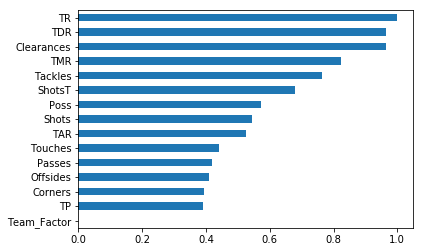

In [188]:
categories = ['Poss', 'ShotsT', 'Shots','Touches', 'Passes', 'Tackles', 'Clearances','Corners', 'Offsides','TP', 'TR', 'TAR', 'TMR', 'TDR', 'Team_Factor']
accuracy=[]

for i in range(1):
    X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train)
    print X_test.shape
    results = model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    print preds
    #test = preds >= 0.55
    #print test
    preds = regressor(preds)
    accuracy.append(np.mean(preds == Y_test))
    #accuracy.append(np.mean(predictions == Y_test))
    print "Finished iteration:", i

print preds
print Y_test
                         
print "The accuracy is", sum(accuracy)/len(accuracy)
showFeatureImportance(categories)